In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path = r"C:\Users\sureh\OneDrive\문서\GitHub\UOM-AI-Sessions\UOM-AI-Sessions\UOM-AI-Sessions\UOM-AI-Sessions\Session_2"

csv_file = path + r"\Sleep.csv"
df = pd.read_csv(csv_file)
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (374, 13)

First 5 rows:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            

In [2]:
print("Missing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)
print("\nDuplicate Rows:", df.duplicated().sum())

Missing Values:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Data Types:
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

Duplicate Rows: 0


In [3]:
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                 'Stress Level', 'Heart Rate', 'Daily Steps']
print("Summary Statistics:")
print(df[numerical_cols].describe())

Summary Statistics:
              Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count  374.000000      374.000000        374.000000               374.000000   
mean    42.184492        7.132086          7.312834                59.171123   
std      8.673133        0.795657          1.196956                20.830804   
min     27.000000        5.800000          4.000000                30.000000   
25%     35.250000        6.400000          6.000000                45.000000   
50%     43.000000        7.200000          7.000000                60.000000   
75%     50.000000        7.800000          8.000000                75.000000   
max     59.000000        8.500000          9.000000                90.000000   

       Stress Level  Heart Rate   Daily Steps  
count    374.000000  374.000000    374.000000  
mean       5.385027   70.165775   6816.844920  
std        1.774526    4.135676   1617.915679  
min        3.000000   65.000000   3000.000000  
25%        4.000000

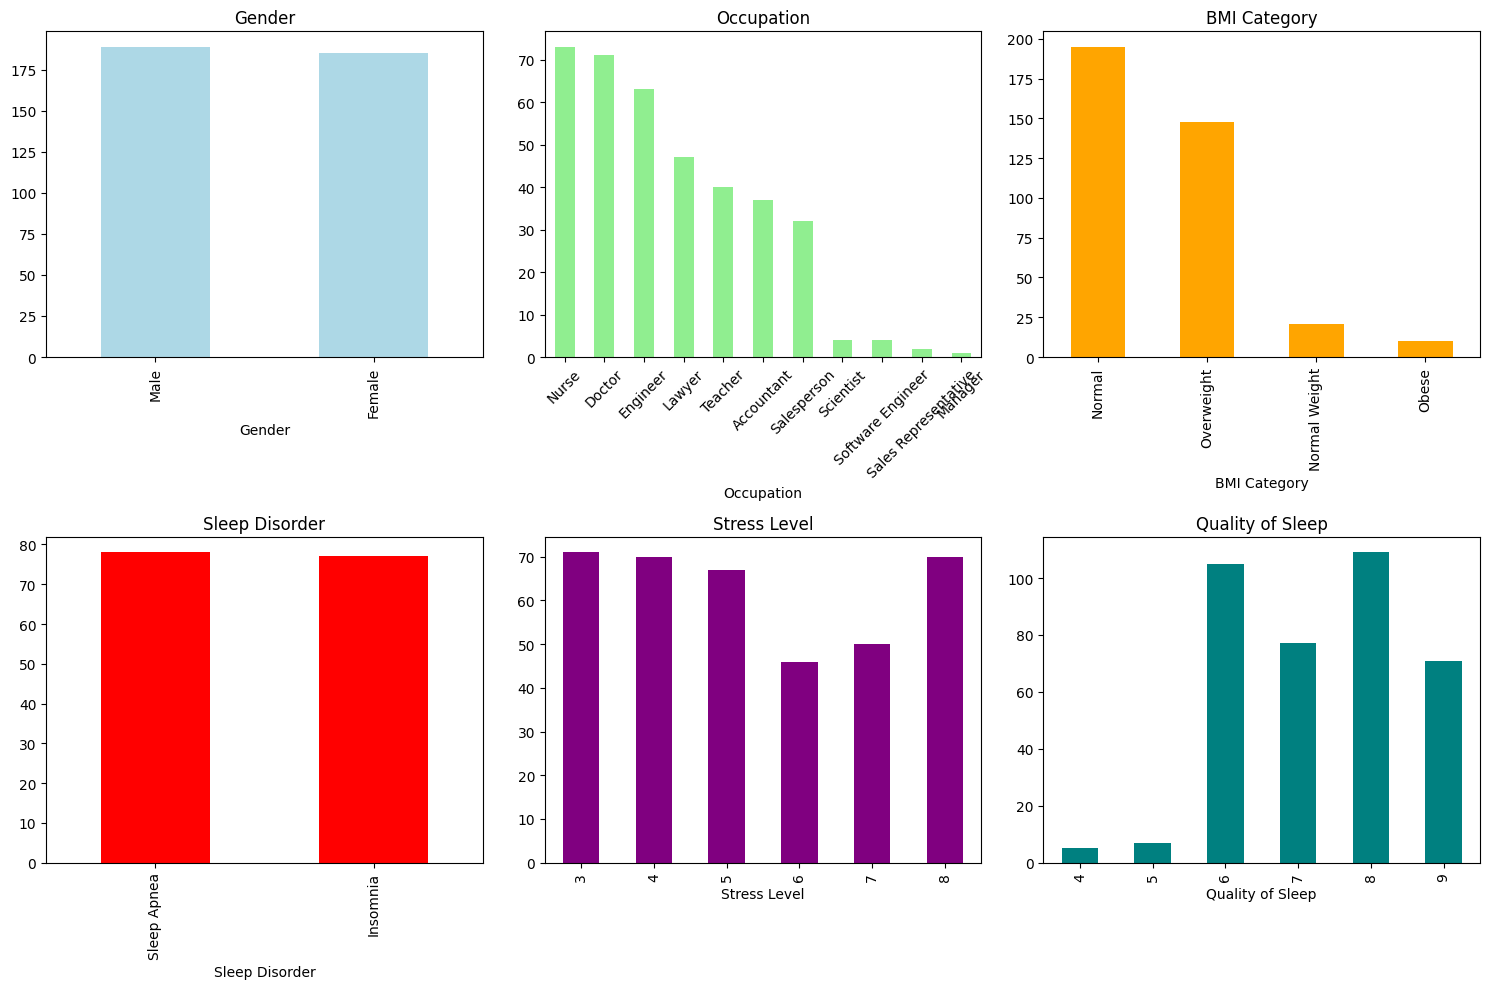

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Gender
df['Gender'].value_counts().plot(kind='bar', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('Gender')

# Occupation
df['Occupation'].value_counts().plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Occupation')
axes[0,1].tick_params(axis='x', rotation=45)

# BMI Category
df['BMI Category'].value_counts().plot(kind='bar', ax=axes[0,2], color='orange')
axes[0,2].set_title('BMI Category')

# Sleep Disorder
df['Sleep Disorder'].value_counts().plot(kind='bar', ax=axes[1,0], color='red')
axes[1,0].set_title('Sleep Disorder')

# Stress Level
df['Stress Level'].value_counts().sort_index().plot(kind='bar', ax=axes[1,1], color='purple')
axes[1,1].set_title('Stress Level')

# Quality of Sleep
df['Quality of Sleep'].value_counts().sort_index().plot(kind='bar', ax=axes[1,2], color='teal')
axes[1,2].set_title('Quality of Sleep')

plt.tight_layout()
plt.show()

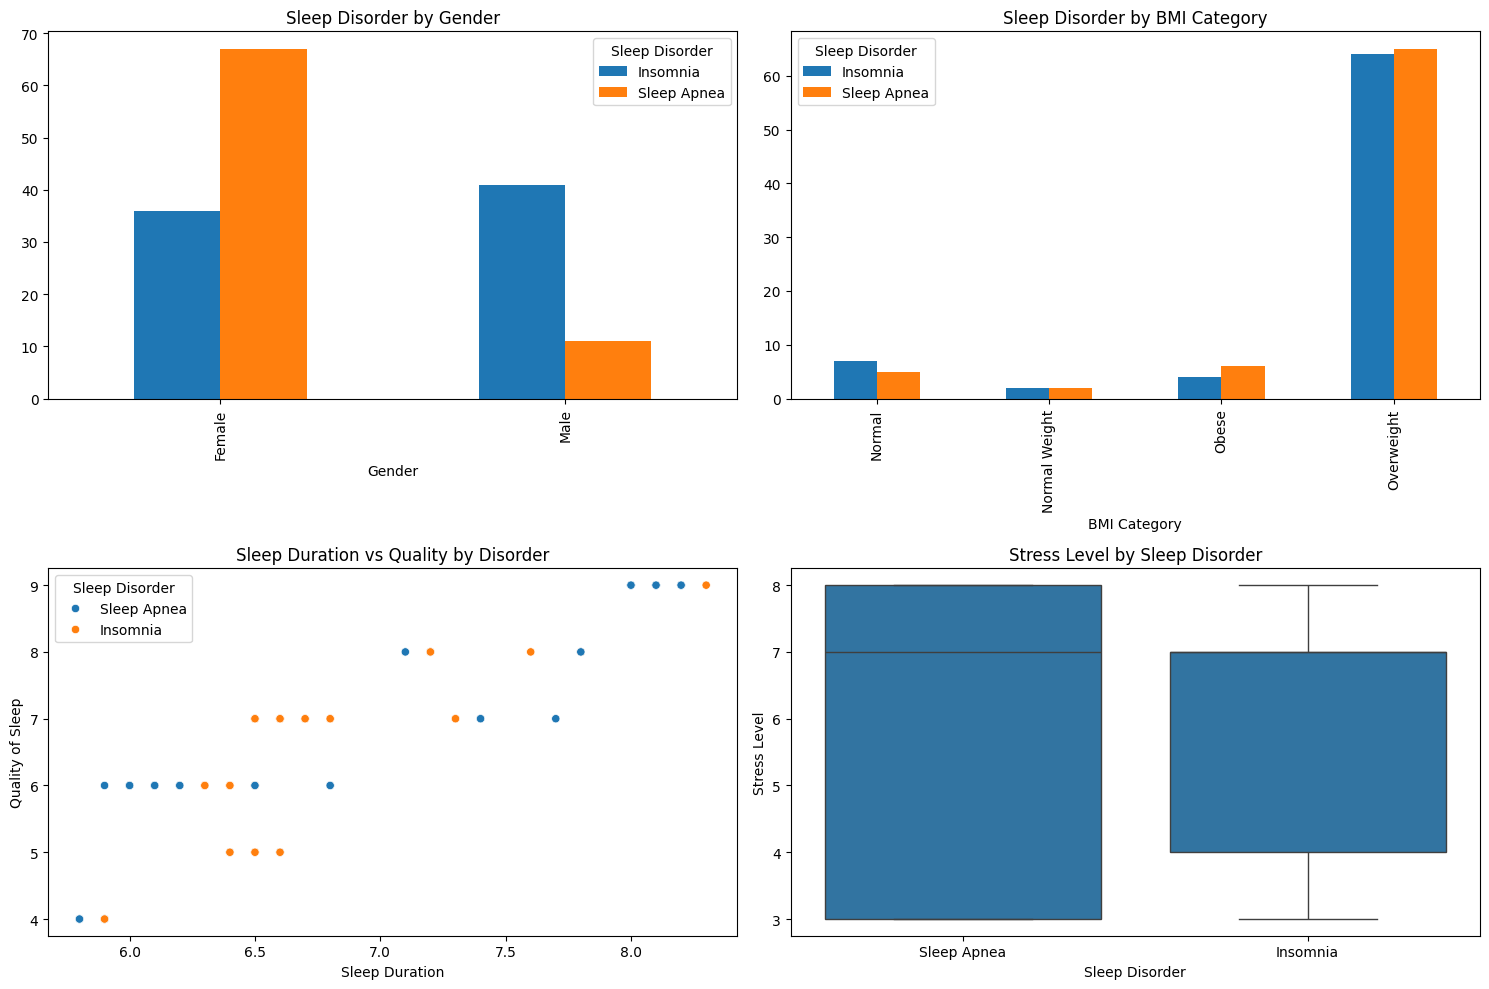

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sleep Disorder by Gender
pd.crosstab(df['Gender'], df['Sleep Disorder']).plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Sleep Disorder by Gender')
axes[0,0].legend(title='Sleep Disorder')

# Sleep Disorder by BMI Category
pd.crosstab(df['BMI Category'], df['Sleep Disorder']).plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Sleep Disorder by BMI Category')
axes[0,1].legend(title='Sleep Disorder')

# Sleep Duration vs Quality of Sleep by Disorder
sns.scatterplot(data=df, x='Sleep Duration', y='Quality of Sleep', hue='Sleep Disorder', ax=axes[1,0])
axes[1,0].set_title('Sleep Duration vs Quality by Disorder')

# Stress Level by Sleep Disorder
sns.boxplot(data=df, x='Sleep Disorder', y='Stress Level', ax=axes[1,1])
axes[1,1].set_title('Stress Level by Sleep Disorder')

plt.tight_layout()
plt.show()

In [6]:
# Sleep patterns by occupation
occupation_stats = df.groupby('Occupation').agg({
    'Sleep Duration': 'mean',
    'Quality of Sleep': 'mean', 
    'Stress Level': 'mean',
    'Sleep Disorder': lambda x: (x != 'None').mean()  # Prevalence of sleep disorders
}).round(2)

print("Sleep Patterns by Occupation:")
print(occupation_stats.sort_values('Sleep Disorder', ascending=False))

Sleep Patterns by Occupation:
                      Sleep Duration  Quality of Sleep  Stress Level  \
Occupation                                                             
Accountant                      7.11              7.89          4.59   
Doctor                          6.97              6.65          6.73   
Engineer                        7.99              8.41          3.89   
Lawyer                          7.41              7.89          5.06   
Manager                         6.90              7.00          5.00   
Nurse                           7.06              7.37          5.55   
Sales Representative            5.90              4.00          8.00   
Salesperson                     6.40              6.00          7.00   
Scientist                       6.00              5.00          7.00   
Software Engineer               6.75              6.50          6.00   
Teacher                         6.69              6.98          4.53   

                      Sleep Disor

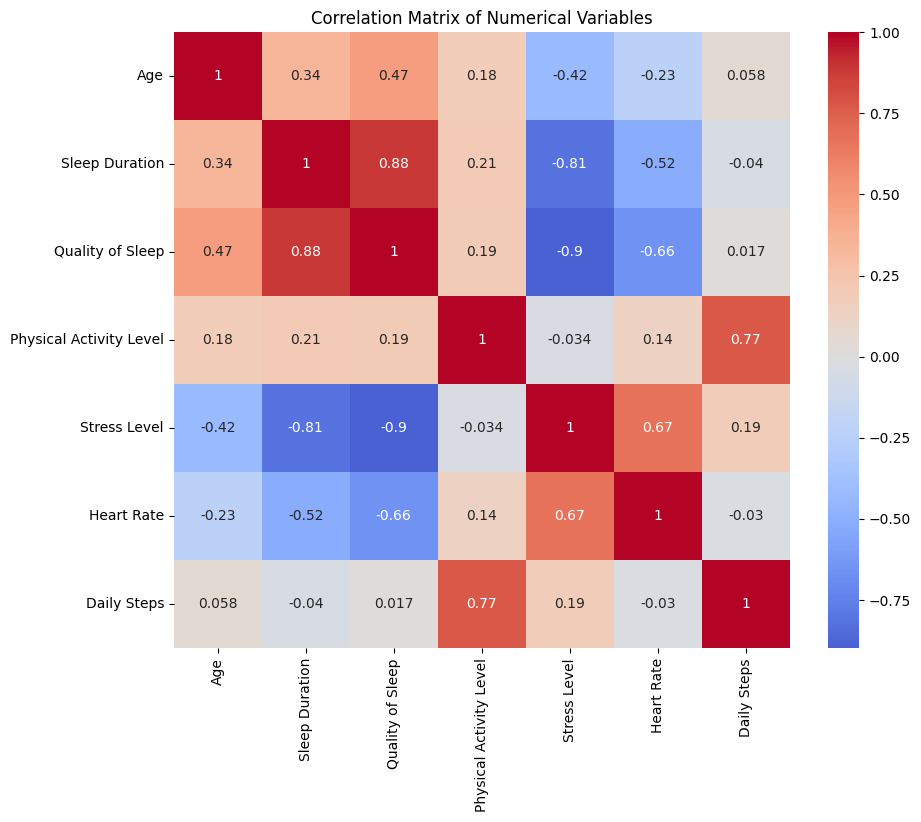

Top Correlations with Sleep Quality:
Quality of Sleep           1.000000
Sleep Duration             0.883213
Age                        0.473734
Physical Activity Level    0.192896
Daily Steps                0.016791
Heart Rate                -0.659865
Stress Level              -0.898752
Name: Quality of Sleep, dtype: float64


In [7]:
numerical_df = df[numerical_cols]

plt.figure(figsize=(10, 8))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

print("Top Correlations with Sleep Quality:")
sleep_quality_corr = correlation_matrix['Quality of Sleep'].sort_values(ascending=False)
print(sleep_quality_corr)

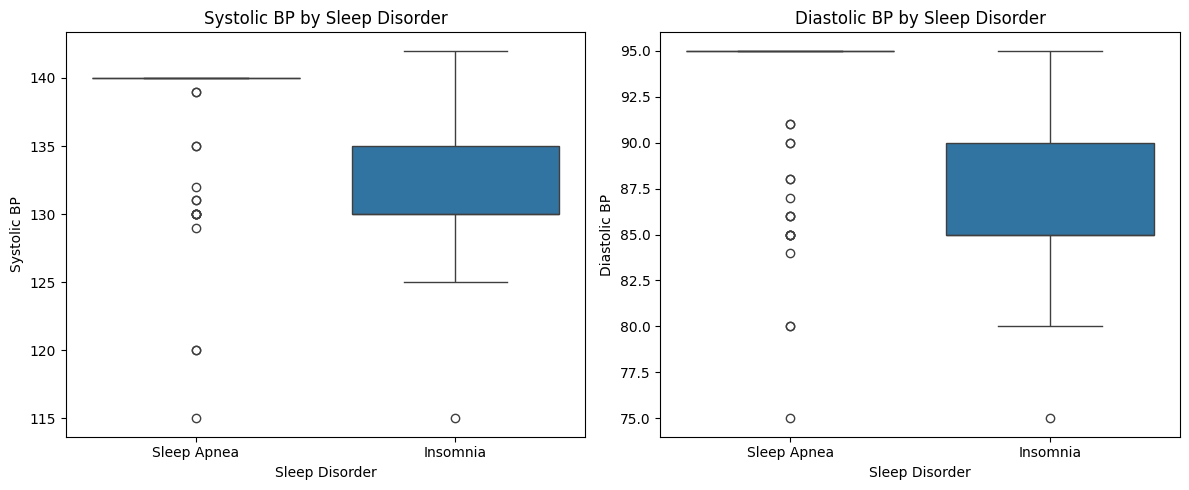

In [8]:
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Sleep Disorder', y='Systolic BP')
plt.title('Systolic BP by Sleep Disorder')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Sleep Disorder', y='Diastolic BP')
plt.title('Diastolic BP by Sleep Disorder')

plt.tight_layout()
plt.show()

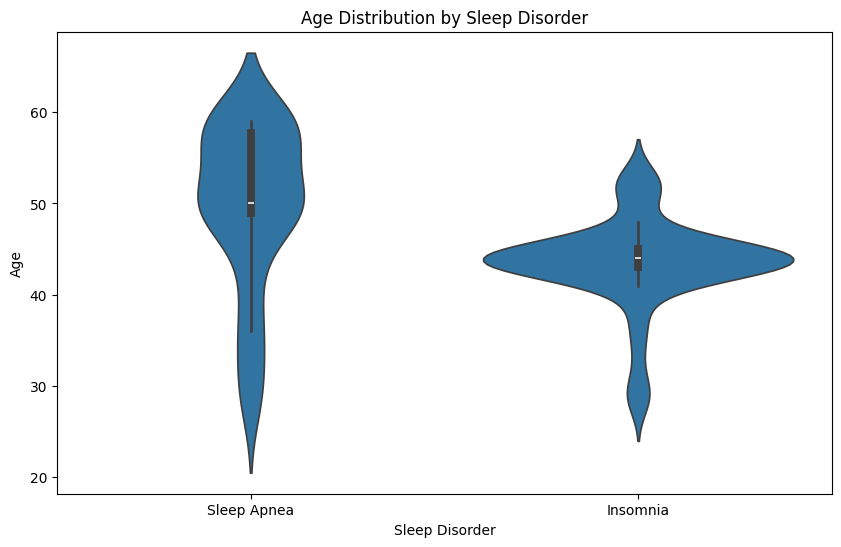

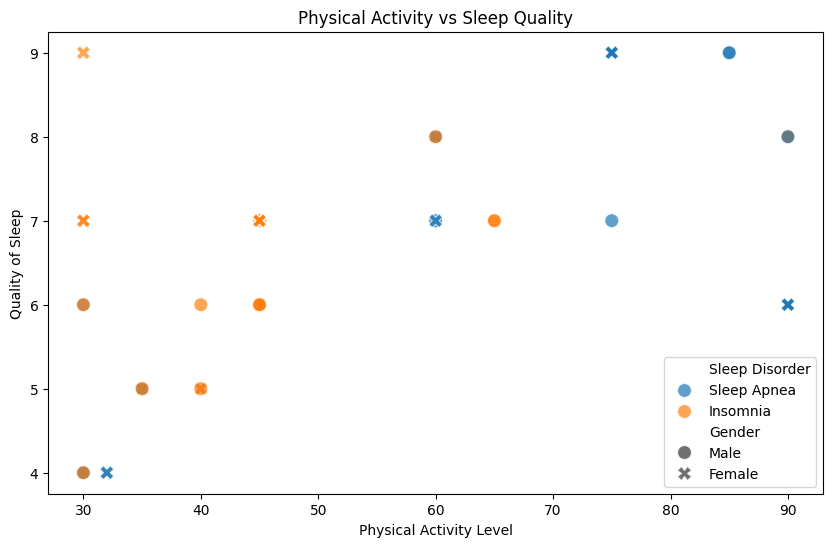

In [9]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Sleep Disorder', y='Age')
plt.title('Age Distribution by Sleep Disorder')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Physical Activity Level', y='Quality of Sleep', 
               hue='Sleep Disorder', style='Gender', s=100, alpha=0.7)
plt.title('Physical Activity vs Sleep Quality')
plt.show()